In [1]:
!pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 921.1 kB/s eta 0:00:00 0:00:01
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 1.7 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf

In [13]:
import tensorflow as tf

# Define constants
a = tf.constant(2)
b = tf.constant(3)

# Use TensorFlow's functions
c = tf.add(a, b)
d = tf.multiply(a, b)

# Print results
print('a + b = ', c.numpy())
print('a * b = ', d.numpy())


a + b =  5
a * b =  6


In [15]:
import tensorflow as tf
import numpy as np

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Training data
x_train = np.array([1, 2, 3, 4], dtype=np.float32)
y_train = np.array([0, -1, -2, -3], dtype=np.float32)

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        linear_model = W * x_train + b
        loss = tf.reduce_sum(input_tensor=tf.square(linear_model - y_train))

    # Compute gradients
    dW, db = tape.gradient(loss, [W, b])

    # Update weights
    W.assign_sub(0.01 * dW)
    b.assign_sub(0.01 * db)

# Evaluate training accuracy
print("W: %s b: %s loss: %s"%(W.numpy(), b.numpy(), loss.numpy()))


W: [-0.9999969] b: [0.9999908] loss: 5.7770677e-11


In [3]:
data = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(data)

tuple

In [9]:
import pandas as pd
# convert data to pandas dataframe
dataframe = pd.DataFrame(data)

In [10]:
dataframe.head()

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, ..."


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0

# Build the model
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')  # 10 classes for the digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up model checkpoints
checkpoint_path = 'mnist_model_checkpoint.h5'
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max')

# Fit the model
model.fit(mnist_train_images, mnist_train_labels, epochs=10, validation_split=0.2, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(mnist_test_images, mnist_test_labels)

print(f'Test accuracy: {test_acc}')


Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2610 - accuracy: 0.9218 - val_loss: 0.1528 - val_accuracy: 0.9545
Epoch 2/10
 186/1500 [==>...........................] - ETA: 1s - loss: 0.1365 - accuracy: 0.9592

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 1s 963us/step - loss: 0.1286 - accuracy: 0.9614 - val_loss: 0.1146 - val_accuracy: 0.9675
Epoch 3/10
1500/1500 [==============================] - 1s 966us/step - loss: 0.0968 - accuracy: 0.9704 - val_loss: 0.1037 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 1s 934us/step - loss: 0.0776 - accuracy: 0.9764 - val_loss: 0.1008 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 1s 952us/step - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0973 - val_accuracy: 0.9693
Epoch 6/10
1500/1500 [==============================] - 1s 917us/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0920 - val_accuracy: 0.9716
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.1021 - val_accuracy: 0.9719
Epoch 8/10
1500/1500 [==============================] - 1s 974us/step - loss: 0.0447 - accuracy: 0.9848 - val_loss: 0.0929 - val_accuracy

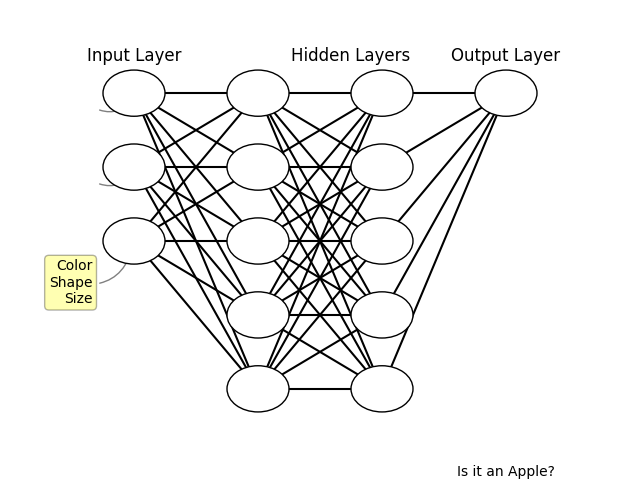

In [18]:
# Adjusting the plot to center the neural network diagram both horizontally and vertically

fig, ax = plt.subplots(figsize=figsize)
ax.axis('off')

# Adjusted horizontal spacing to center the plot
adjusted_h_spacing = 1 / (len(layer_sizes) + 1)
# Calculate total height to center vertically
total_height = max(layer_sizes) * v_spacing

# Create nodes with adjusted spacing
for i, layer_size in enumerate(layer_sizes):
    layer_top = (1 - total_height) / 2 + (total_height - layer_size * v_spacing) + v_spacing / 2
    for j in range(layer_size):
        circle = plt.Circle(((i + 1) * adjusted_h_spacing, layer_top + j * v_spacing), node_radius, color='w', ec='k', zorder=4)
        ax.add_artist(circle)
        # Annotations for input layer
        if i == 0:
            ax.annotate(
                'Color\nShape\nSize' if j == 0 else '',
                xy=((i + 1) * adjusted_h_spacing, layer_top + j * v_spacing), xycoords='data',
                xytext=(-30, -10 if j != 0 else -30), textcoords='offset points',
                va='center', ha='right', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5', color='gray')
            )

# Create edges with adjusted spacing
for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:]), start=1):
    layer_top_a = (1 - total_height) / 2 + (total_height - layer_size_a * v_spacing) + v_spacing / 2
    layer_top_b = (1 - total_height) / 2 + (total_height - layer_size_b * v_spacing) + v_spacing / 2
    for m in range(layer_size_a):
        for o in range(layer_size_b):
            line = plt.Line2D([(i + 1) * adjusted_h_spacing - adjusted_h_spacing, (i + 1) * adjusted_h_spacing],
                              [layer_top_a + m * v_spacing, layer_top_b + o * v_spacing], c='k')
            ax.add_artist(line)

# Add text with adjusted spacing
ax.text(adjusted_h_spacing, total_height + 0.1, 'Input Layer', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
ax.text(2 * adjusted_h_spacing + 0.15, total_height + 0.1, 'Hidden Layers', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
ax.text(len(layer_sizes) * adjusted_h_spacing, total_height + 0.1, 'Output Layer', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
ax.text(len(layer_sizes) * adjusted_h_spacing, (1 - total_height) / 2 - 0.1, 'Is it an Apple?', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

plt.show()


In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model instance
model = Sequential([
    Dense(4, input_dim=2, activation='relu', name='Hidden_Layer'),
    Dense(1, activation='sigmoid', name='Output_Layer')
])

# Function to plot the neural network
def plot_neural_network(model, figsize=(8, 6)):
    # Create a figure
    fig = plt.figure(figsize=figsize)
    
    # Create a plot with a single subplot
    ax = fig.add_subplot(111)
    
    # Add layers to the plot
    for layer in model.layers:
        # Get weights and biases
        weights, biases = layer.get_weights()
        
        # Get number of inputs and outputs (neurons)
        n_inputs = weights.shape[0]
        n_outputs = weights.shape[1]
        
        # Draw neurons
        for i in range(n_outputs):
            circle = plt.Circle((i + 1, layer_count), 0.5, color='w', ec='k', zorder=4)
            ax.add_artist(circle)

            # Annotate with layer names
            if i == 0:
                ax.annotate(layer.name, xy=(i + 1, layer_count + 0.5), xytext=(0, 10),
                            textcoords='offset points', ha='center', va='bottom')

            # Draw connections and weights
            for j in range(n_inputs):
                line = plt.Line2D([j + 1, i + 1], [layer_count - 1, layer_count], c='k')
                ax.add_artist(line)
                
                # Weight label
                if layer_count > 1:
                    weight = weights[j][i]
                    ax.text((j + 1 + i + 1) / 2, (layer_count - 1 + layer_count) / 2, f'{weight:.2f}',
                            ha='center', va='center')

        layer_count += 1
    
    # Set the limits and labels
    ax.set


In [24]:
!pip install pydot

In [31]:
!brew install graphviz



Running `brew update --auto-update`...
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:d783cbeb6e6ef0d71c0b442317b54554370decd6fac66bf2d4938c07a63f67be
######################################################################### 100.0%###############################    97.5%
==> Pouring portable-ruby-3.1.4.arm64_big_sur.bottle.tar.gz
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abi3audit                                pmix
action-validator                         presenterm
ain                                      purr
ali                                      python-abseil
am

In [25]:
# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
!pip install graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 285.8 kB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Generate random data points
np.random.seed(0)
points = np.random.normal(0, 1, (5000, 2))
labels = np.where(np.linalg.norm(points, axis=1) < 1, 1, 0)  # 1 inside the circle, 0 outside

# Define a simple Sequential model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Input layer with 2 inputs, hidden layer with 4 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron
])

# Compile the model - binary crossentropy is used since it's a binary classification problem
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

# Train the model
model.fit(points, labels, epochs=10, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(points, labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
500/500 [==============================] - 0s 439us/step - loss: 0.6337 - accuracy: 0.5226
Epoch 2/10
500/500 [==============================] - 0s 426us/step - loss: 0.5903 - accuracy: 0.6046
Epoch 3/10
500/500 [==============================] - 0s 425us/step - loss: 0.5478 - accuracy: 0.6744
Epoch 4/10
500/500 [==============================] - 0s 502us/step - loss: 0.5004 - accuracy: 0.7566
Epoch 5/10
500/500 [==============================] - 0s 434us/step - loss: 0.4528 - accuracy: 0.8090
Epoch 6/10
500/500 [==============================] - 0s 415us/step - loss: 0.4091 - accuracy: 0.8606
Epoch 7/10
500/500 [==============================] - 0s 451us/step - loss: 0.3716 - accuracy: 0.8898
Epoch 8/10
500/500 [==============================] - 0s 410us/step - loss: 0.3403 - accuracy: 0.9116
Epoch 9/10
500/500 [==============================] - 0s 431us/step - loss: 0.3146 - accuracy: 0.9260
Epoch 10/10
157/157 [==============================] - 0s 431us/step - loss: 0.284

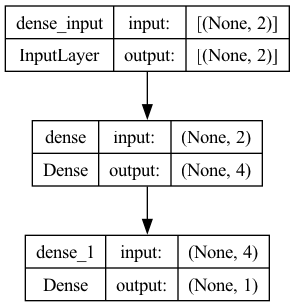

In [3]:
from tensorflow.keras.utils import plot_model

# After defining the model (as we did in the previous snippet), we can plot the model.
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [4]:
import numpy as np

# Calculating the sigmoid activation for the output neuron
weighted_sum = -0.635
output = 1 / (1 + np.exp(-weighted_sum))
output

0.34637766910049594

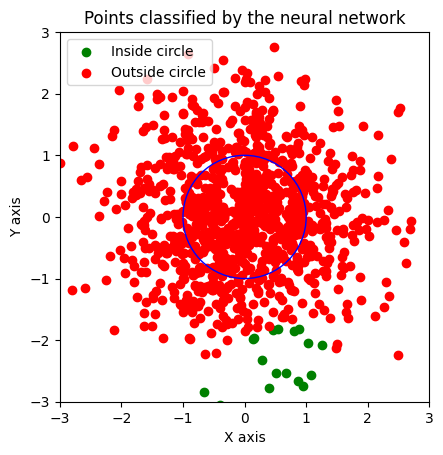

In [5]:
import matplotlib.pyplot as plt

# Let's generate some random points
np.random.seed(0)
points = np.random.normal(0, 1, (1000, 2))

# And use our neural network's final output function to determine if they are inside the circle
# We'll use a simple threshold of 0.5 for classification for this visualization
inside_circle = np.array([1 / (1 + np.exp(-(0.5 * max(0, np.dot([0.2, -0.4], p)) +
                                             -0.5 * max(0, np.dot([0.7, 0.3], p)) +
                                             0.3 * max(0, np.dot([-0.6, 0.6], p)) +
                                             -0.2 * max(0, np.dot([-0.3, 0.8], p)) - 
                                             0.4))) > 0.5 for p in points])

# Plotting the circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)

# Plotting the points
plt.scatter(points[inside_circle][:, 0], points[inside_circle][:, 1], color='green', label='Inside circle')
plt.scatter(points[~inside_circle][:, 0], points[~inside_circle][:, 1], color='red', label='Outside circle')

# Plotting details
plt.gca().add_artist(circle)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.title('Points classified by the neural network')

# Show the plot
plt.show()


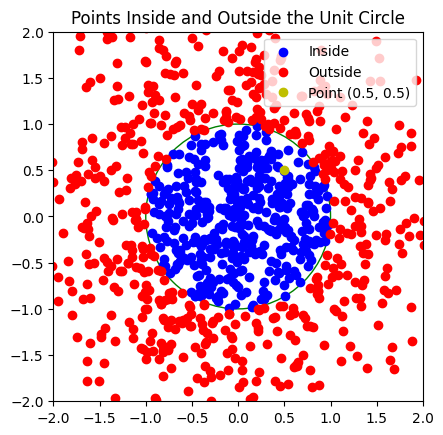

In [6]:
import matplotlib.pyplot as plt

# Let's generate some points and label them based on being inside or outside the circle
np.random.seed(0)
points = np.random.normal(0, 1, (1000, 2))
labels = np.where(np.linalg.norm(points, axis=1) < 1, 1, 0)  # 1 inside the circle, 0 outside

# Now we plot the circle
circle = plt.Circle((0, 0), 1, color='green', fill=False)

# Plotting the points - different color for points inside (blue) and outside (red) the circle
inside_points = points[labels == 1]
outside_points = points[labels == 0]

fig, ax = plt.subplots()
ax.add_artist(circle)

ax.scatter(inside_points[:, 0], inside_points[:, 1], c='blue', label='Inside')
ax.scatter(outside_points[:, 0], outside_points[:, 1], c='red', label='Outside')

# Let's also plot the point (0.5, 0.5) to see where it lies
ax.plot(0.5, 0.5, 'yo', label='Point (0.5, 0.5)')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal', 'box')
ax.legend()
plt.title('Points Inside and Outside the Unit Circle')
plt.show()


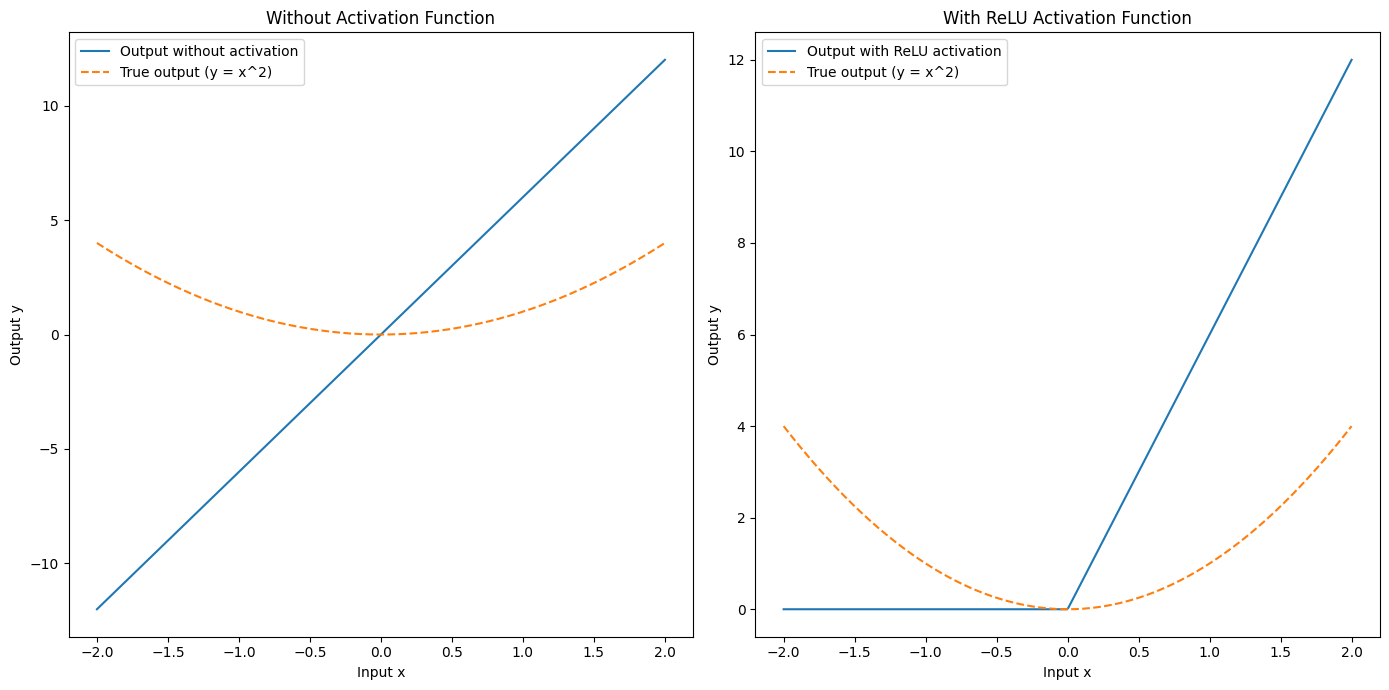

In [7]:
# Define a range of x values
x_values = np.linspace(-2, 2, 400)

# Without activation function (linear)
w1 = 2
w2 = 3
output_without_activation = x_values * w1 * w2

# With ReLU activation function (non-linear)
def relu(x):
    return np.maximum(0, x)

hidden_layer_output = relu(x_values * w1)
output_with_activation = hidden_layer_output * w2

# True non-linear relationship (y = x^2)
true_output = x_values**2

# Plot the results
plt.figure(figsize=(14, 7))

# Plot without activation function
plt.subplot(1, 2, 1)
plt.plot(x_values, output_without_activation, label='Output without activation')
plt.plot(x_values, true_output, label='True output (y = x^2)', linestyle='--')
plt.title('Without Activation Function')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()

# Plot with activation function
plt.subplot(1, 2, 2)
plt.plot(x_values, output_with_activation, label='Output with ReLU activation')
plt.plot(x_values, true_output, label='True output (y = x^2)', linestyle='--')
plt.title('With ReLU Activation Function')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()

plt.tight_layout()
plt.show()
